1) Read and Normalise the dataset
2) Generate W foor every query point
3) No training is involved, directly make predications using closed form solution => theta = (X'WX)inv * X'WY where X' is X_Transpose
   - where W matrix is m x m diagonal matrix, W is different for every testing/query point x. w(i) = e^(-((x(i)-x)^2/2*(tau^2)))
4) Find best value of Tau(Bandwidth Parameter - Hyper parameter)[Cross Validation]

# Loading Data

Locally weighted regression - 
Non-parametric algorithm - we cannot learn theta which can represent entire function.
For every query point, we can generate theta though

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# %matplotlib inline

In [2]:
dfx = pd.read_csv("./weightedX.csv")
dfy = pd.read_csv("./weightedY.csv")

In [3]:
X = dfx.values
Y = dfy.values

In [4]:
print(X.shape)

(99, 1)


In [5]:
print(Y.shape)

(99, 1)


In [9]:
plt.style.use('seaborn')

/var/folders/7s/1h5g7ghd0j57351mn1qdyg9c0000gn/T/ipykernel_11868/240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


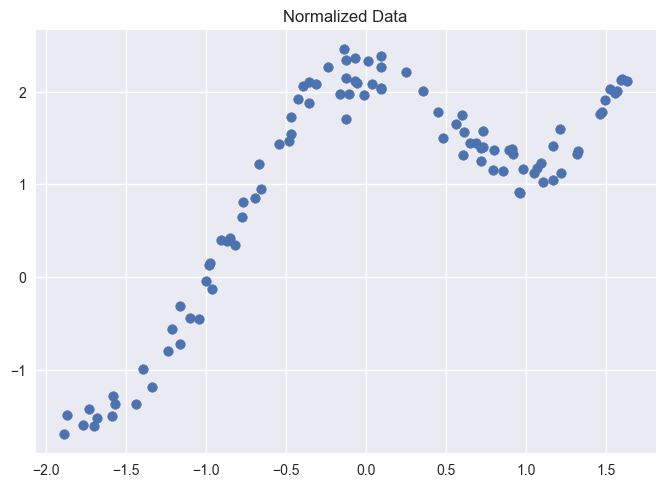

In [18]:
### 99 training points, each having 1 feature
# Normalize the data
u = X.mean()
std = X.std()
X = (X-u)/std
plt.title('Normalized Data')
plt.scatter(X,Y)
plt.show()

Predict the right theta for every point on above graph - which means Infinitely many predictions - 

But, compute theta / do prediction only for given query / test point using weighted loss(more wt to example points in nearby region to predict theta of current test point). No generic theta - No fixed curve

Tau paramter controls - how quickly the wt falls as we move away from this testing point/region.

### Find out W m x m diagonal matrix for every query point

In [10]:
np.eye(5)

# this is numpy array, we need to do a np.dot product to do matrix mul in this case. If not taken dot product, simple '*' performs element - wise multiplication.

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [11]:
np.mat(np.eye(5))

# This is np matrix - '*' performs matrix multiplication in this case.

matrix([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [19]:
def getW(query_point, X, tau):
    M = X.shape[0]
    W = np.mat(np.eye(M))
    for i in range(M):
        # X[i] can hold n features.
        W[i,i] = np.exp(np.dot((X[i] - query_point), (X[i] - query_point).T)/(-2*tau*tau)) # compute Wt for every training point - how much each training point ll influence the parameters of a given test point query_point
    return W

In [29]:
W = getW(-1, X, 0.5)
print(W.shape)
print(W)

(99, 99)
[[4.37461134e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.35741601e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.34593282e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.29054046e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.78787793e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.21221566e-05]]


In [26]:
X

array([[-0.35705077],
       [-0.8177695 ],
       [-0.35449839],
       [ 0.56434066],
       [-0.0695723 ],
       [ 1.63427275],
       [-1.23691358],
       [ 0.0964585 ],
       [-0.15934525],
       [-0.47787082],
       [-0.13871693],
       [ 1.55414447],
       [ 1.04983848],
       [-1.43495385],
       [ 1.10400351],
       [ 0.91627741],
       [-0.66514711],
       [ 0.7349532 ],
       [-1.67992041],
       [ 0.09530784],
       [ 0.89223893],
       [-1.3909356 ],
       [ 0.09177215],
       [-1.16088587],
       [ 1.1688593 ],
       [-0.97627703],
       [-0.9041323 ],
       [-0.86668541],
       [ 0.72173099],
       [-0.1239047 ],
       [-1.69713857],
       [-1.21124325],
       [ 0.68541175],
       [ 1.57129987],
       [ 0.61400763],
       [ 0.95912407],
       [-1.15804059],
       [ 0.85648457],
       [ 1.21227083],
       [ 0.97998253],
       [ 0.79945332],
       [ 1.32568476],
       [-0.3942487 ],
       [ 0.45008988],
       [-1.88697772],
       [ 1

In [27]:
# Change tau to 100 or large, W gets close to identity matrix and the formula becomes the linear regression problem i.e. all training points contribute to find theta
# = (X'X)inv * X'Y
# if tau is large -> tau^2 is very large -> eventually e^-(1/INFINITY) = e^0 = 1
# Use smaller tau / bandwidth / region in the vicinity of the given testing point to have local closer points more impact on the loss.
# change Tau to 0.5 and observe.

### MAKE PREDICTIONS

In [55]:
def predict(X, Y, query_x, tau):
    M = X.shape[0]
    ones = np.ones((X.shape[0],1))
    X_ = np.hstack((X, ones)) # add bias/intercept/theta feature at the end.
    qx = np.mat([query_x,1]) # add bias/intercept/theta feature at the end.
    # print(X_.shape)
    # print(X_[:5,:])
    # print(qx)
    # print(type(qx))
    # print(type(X_))
    W = getW(query_x,X_,tau)
    # print(type(W))
    # (X'WX)inv * X'WY
    theta = np.linalg.inv(X_.T*(W*X_)) * (X_.T*(W*Y))
    pred = np.dot(qx, theta)
    return theta, pred
    
theta, pred = predict(X, Y, 1.0, 1.0)
print(theta)
print(type(theta))
print(pred)
print(type(pred))

[[0.14069504]
 [1.45348191]]
<class 'numpy.matrix'>
[[1.59417694]]
<class 'numpy.matrix'>


In [79]:
### Visualize Predictions, Analyse Tau (find best tau for given example)
def plotPrediction(tau = 1):
    X_test = np.linspace(-2,2,20)
    Y_test = []
    print(X_test)
    for xq in X_test:
        theta_test, y_test = predict(X, Y, xq, tau)
        # print(type(np.array(y_test)[0,0]))
        # print(type(y_test[0,0]))
        Y_test.append(y_test[0,0])
    X_test_np = np.array(X_test)
    Y_test_np = np.array(Y_test)
    # plot scatter only works with numpy array
    plt.title(f"For Tau = {tau}")
    plt.scatter(X, Y)
    plt.scatter(X_test_np, Y_test_np, color = 'orange')
    plt.show()
    print(Y_test)

[-2.         -1.78947368 -1.57894737 -1.36842105 -1.15789474 -0.94736842
 -0.73684211 -0.52631579 -0.31578947 -0.10526316  0.10526316  0.31578947
  0.52631579  0.73684211  0.94736842  1.15789474  1.36842105  1.57894737
  1.78947368  2.        ]


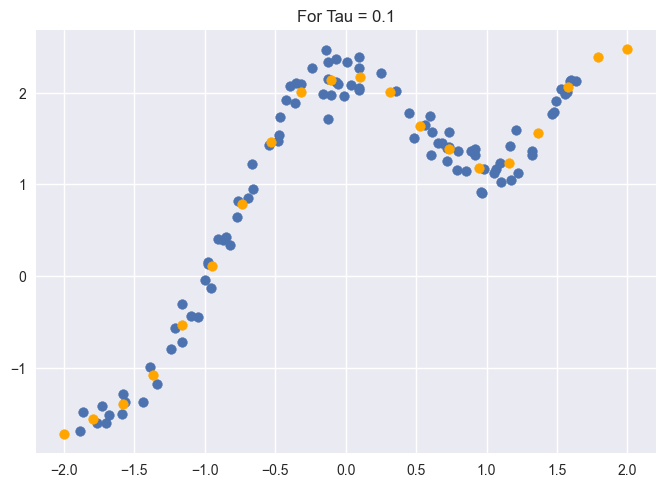

[-1.724120960595883, -1.5548185456888834, -1.3948939486530536, -1.0836948178703278, -0.5347141666801396, 0.10570751999980876, 0.7894956401729267, 1.4653783427583287, 2.011378526158892, 2.1342402284441633, 2.174075543098597, 2.0083366255411303, 1.6315830541182192, 1.3846274809209453, 1.1811702233342787, 1.2373225345131103, 1.5551211055856977, 2.0595424213887843, 2.38664906564066, 2.474950927444297]
[-2.         -1.78947368 -1.57894737 -1.36842105 -1.15789474 -0.94736842
 -0.73684211 -0.52631579 -0.31578947 -0.10526316  0.10526316  0.31578947
  0.52631579  0.73684211  0.94736842  1.15789474  1.36842105  1.57894737
  1.78947368  2.        ]


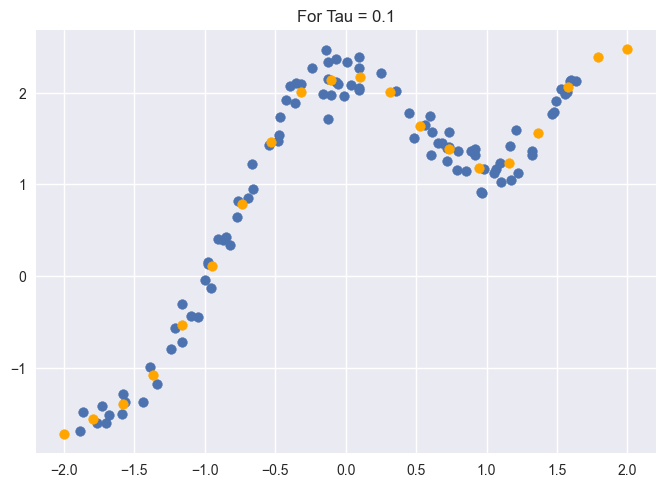

[-1.724120960595883, -1.5548185456888834, -1.3948939486530536, -1.0836948178703278, -0.5347141666801396, 0.10570751999980876, 0.7894956401729267, 1.4653783427583287, 2.011378526158892, 2.1342402284441633, 2.174075543098597, 2.0083366255411303, 1.6315830541182192, 1.3846274809209453, 1.1811702233342787, 1.2373225345131103, 1.5551211055856977, 2.0595424213887843, 2.38664906564066, 2.474950927444297]
[-2.         -1.78947368 -1.57894737 -1.36842105 -1.15789474 -0.94736842
 -0.73684211 -0.52631579 -0.31578947 -0.10526316  0.10526316  0.31578947
  0.52631579  0.73684211  0.94736842  1.15789474  1.36842105  1.57894737
  1.78947368  2.        ]


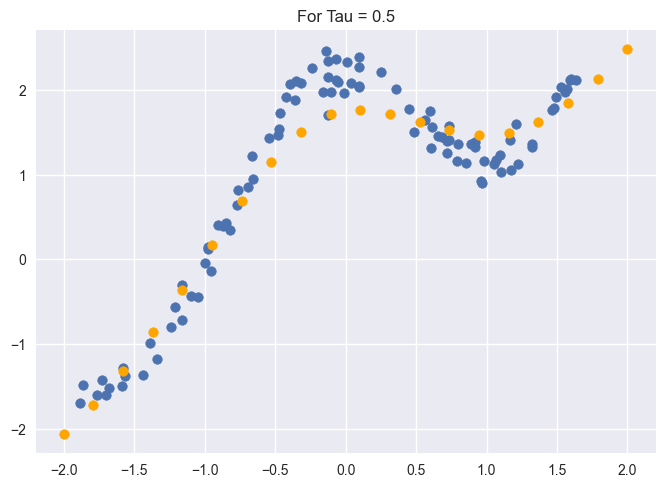

[-2.062848492481102, -1.719630590191083, -1.3182080587838128, -0.8629170709564211, -0.36246072959848963, 0.16417180784177887, 0.6840448560658405, 1.1509962937338822, 1.5087997069379147, 1.7122476222933374, 1.7669517862045852, 1.7220854898339422, 1.6270504258480565, 1.5246124132693275, 1.464005559672279, 1.4911194035826973, 1.6214432763041202, 1.8419505025770848, 2.133932416440796, 2.4839058206056563]
[-2.         -1.78947368 -1.57894737 -1.36842105 -1.15789474 -0.94736842
 -0.73684211 -0.52631579 -0.31578947 -0.10526316  0.10526316  0.31578947
  0.52631579  0.73684211  0.94736842  1.15789474  1.36842105  1.57894737
  1.78947368  2.        ]


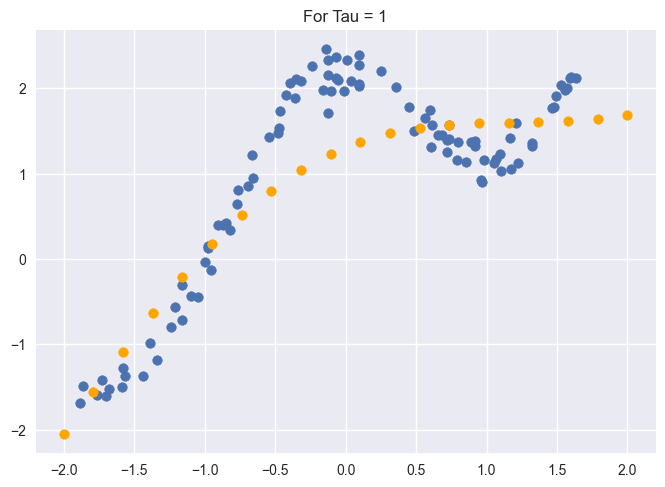

[-2.0530391401130657, -1.5650208972336968, -1.089251329270236, -0.6351888368806922, -0.21207012856934848, 0.17194765827459535, 0.510574477941127, 0.799919608455104, 1.0386637422435492, 1.227895523887128, 1.3707452319940108, 1.4719797626210145, 1.5376753123415148, 1.5749987468330982, 1.5920540107433458, 1.5977132754033372, 1.6013567651584806, 1.612480124470599, 1.6401796907024146, 1.6925785414509589]
[-2.         -1.78947368 -1.57894737 -1.36842105 -1.15789474 -0.94736842
 -0.73684211 -0.52631579 -0.31578947 -0.10526316  0.10526316  0.31578947
  0.52631579  0.73684211  0.94736842  1.15789474  1.36842105  1.57894737
  1.78947368  2.        ]


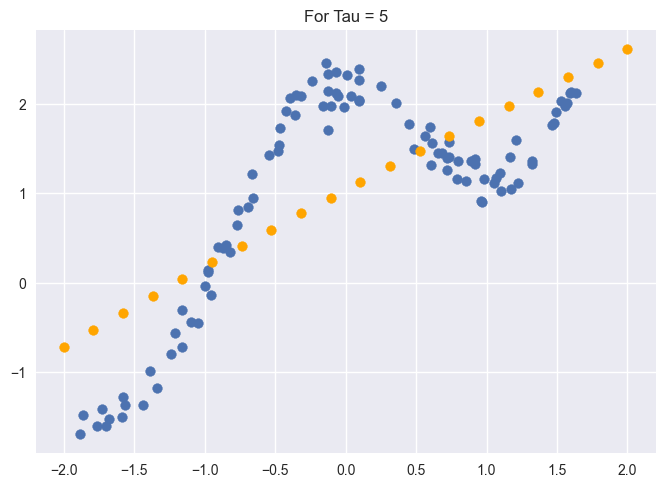

[-0.7249322857882086, -0.529706457208611, -0.336675140505418, -0.14583062263533164, 0.04283495040208929, 0.2293295730281547, 0.41366137959723936, 0.595838643957044, 0.7758697790563902, 0.9537633366000204, 1.129528006749795, 1.3031726178716325, 1.4747061363274998, 1.644137666311702, 1.8114764497306721, 1.9767318661254314, 2.1399134326358125, 2.3010308040055474, 2.4600937726272107, 2.617112268626009]
[-2.         -1.78947368 -1.57894737 -1.36842105 -1.15789474 -0.94736842
 -0.73684211 -0.52631579 -0.31578947 -0.10526316  0.10526316  0.31578947
  0.52631579  0.73684211  0.94736842  1.15789474  1.36842105  1.57894737
  1.78947368  2.        ]


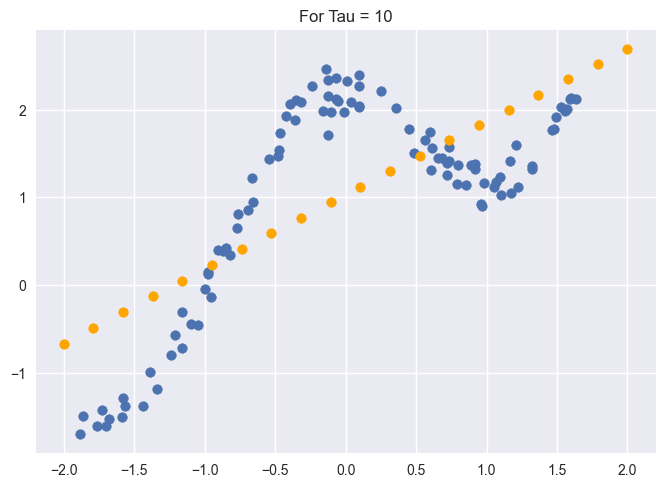

[-0.671242785974729, -0.4895773831502239, -0.30845077918637265, -0.12786243798328245, 0.05218817872860215, 0.2317016113874919, 0.4106784025992979, 0.5891190971367228, 0.7670242419384002, 0.9443943861080737, 1.1212300809138318, 1.297531879787384, 1.4733003383233785, 1.6485360142787804, 1.823239467572276, 1.9974112602837382, 2.171051956653728, 2.344162123083045, 2.516742328132324, 2.688793142521671]


In [80]:
plotPrediction(0.1) # lesser tau, perfect fit
taus = [0.1, 0.5, 1, 5, 10]
for tau in taus:
    plotPrediction(tau)

In [44]:
type(X)

numpy.ndarray

In [45]:
type(Y)

numpy.ndarray